# Jonathan Halverson
# Tuesday, August 29, 2017
# Geron Chapter 2

Create a regression model for the median value of homes in a given district.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [53]:
hs = pd.read_csv('geron_housing/housing.csv', header=0)
xs = hs.copy() # make clean copy so that hs is preserved
hs

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [54]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We see that total_bedrooms has some null values.

In [55]:
hs.describe().applymap(lambda x: round(x, 1))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.0,20640.0,20640.0,20640.0,20433.0,20640.0,20640.0,20640.0,20640.0
mean,-119.6,35.6,28.6,2635.8,537.9,1425.5,499.5,3.9,206855.8
std,2.0,2.1,12.6,2181.6,421.4,1132.5,382.3,1.9,115395.6
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,14999.0
25%,-121.8,33.9,18.0,1447.8,296.0,787.0,280.0,2.6,119600.0
50%,-118.5,34.3,29.0,2127.0,435.0,1166.0,409.0,3.5,179700.0
75%,-118.0,37.7,37.0,3148.0,647.0,1725.0,605.0,4.7,264725.0
max,-114.3,42.0,52.0,39320.0,6445.0,35682.0,6082.0,15.0,500001.0


Let's look at the one categorical feature:

In [5]:
hs.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

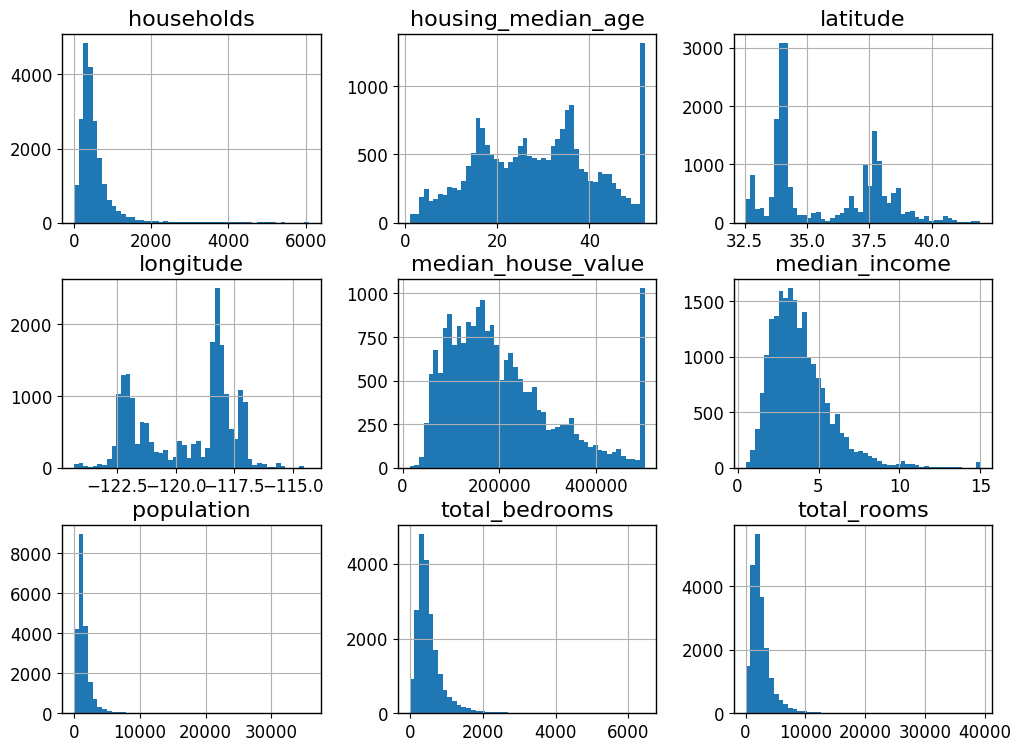

In [6]:
_ = hs.hist(bins=50, figsize=(12, 12 / (4 / 3.0)))

Observations: Some of the distributions are tail heavy and we may consider appling a log or square root transformation. Two predictors are capped at a maximum value. The quantaties are of different scales and need to be stardardized or the like. Not only are the distributions tail heavy but clearly there are points that are more then 3 sigma from the mean. These can potentially be removed (or the removal or inclusion can be treated as a hyperparameter).

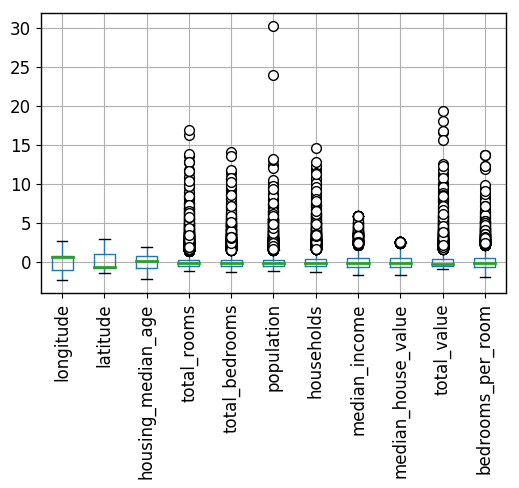

In [73]:
((df - df.mean()) / df.std()).boxplot(rot=90)

Create a new feature:

In [83]:
hs['income_cat'] = np.ceil(hs['median_income'] / 1.5)
# Return an object whose corresponding entries are from self where cond is True and otherwise are from other
hs['income_cat'].where(hs['income_cat'] < 5, 5.0, inplace=True)

In [84]:
hs.income_cat.value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f3ad990>]], dtype=object)

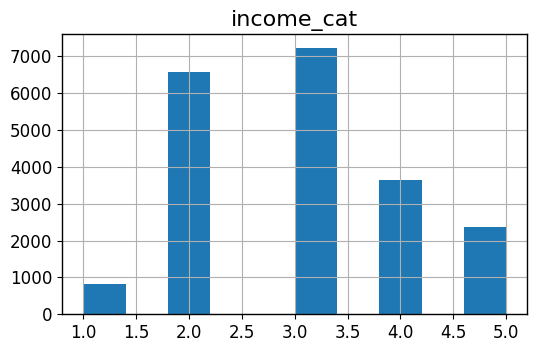

In [85]:
hs.hist('income_cat')

The belief is that income category is an important predictor. In fact, one may take care to ensure that the distribution of records between the test and train sets have the same distribution as the overall income category predictor.

In [9]:
hs.drop('income_cat', axis=1, inplace=True)

### Create test set

In [10]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(hs, test_size=0.2, random_state=42)

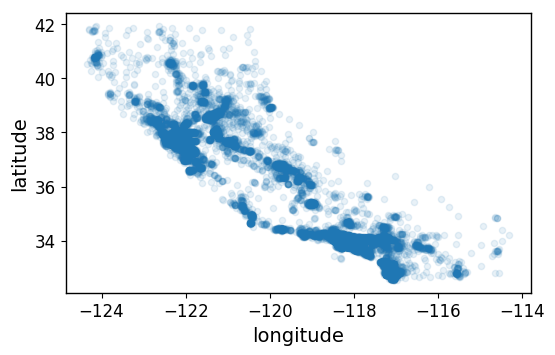

In [11]:
train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

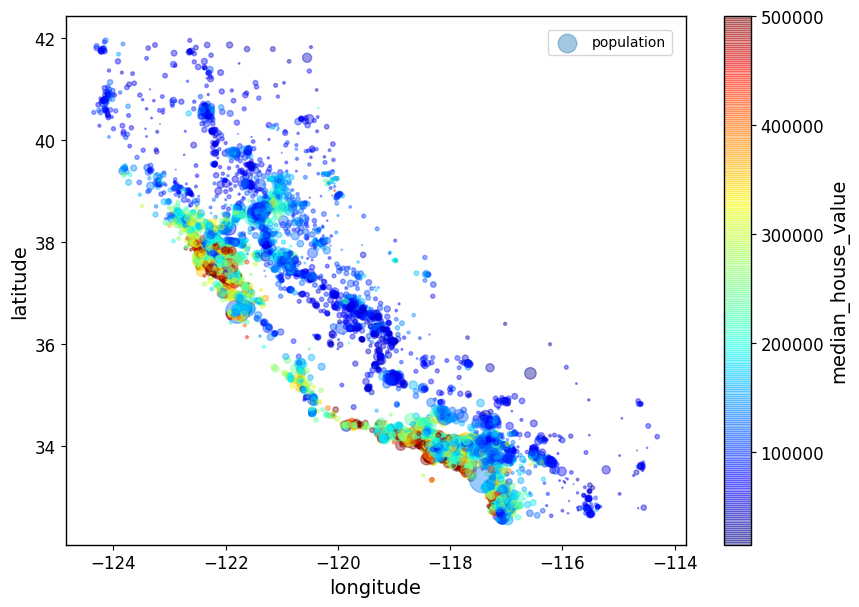

In [12]:
train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=train["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

It appears median house value is associated with population density. It also appears like there are a few clusters. One could introduce the quantity total value as the product of median house value and population.

In [13]:
hs['total_value'] = hs.population * hs.median_house_value

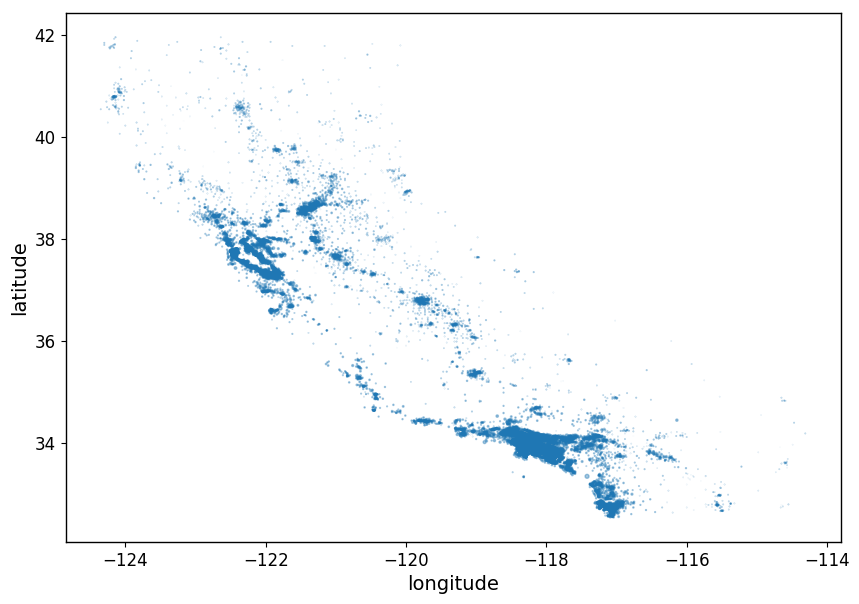

In [14]:
hs.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=10*hs["total_value"]/hs.total_value.max(), figsize=(10,7))

The figure above makes it much easier to see the clusters. They are basically, San Francisco, Sacramento, LA and San Diego.

In [104]:
corr_mat = train.corr().applymap(lambda x: round(x, 2))
corr_mat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.00,-0.92,-0.10,0.04,0.06,0.09,0.05,-0.02,-0.05
latitude,-0.92,1.00,0.01,-0.03,-0.06,-0.10,-0.06,-0.08,-0.14
housing_median_age,-0.10,0.01,1.00,-0.36,-0.32,-0.29,-0.30,-0.12,0.10
total_rooms,0.04,-0.03,-0.36,1.00,0.93,0.86,0.92,0.20,0.13
total_bedrooms,0.06,-0.06,-0.32,0.93,1.00,0.88,0.98,-0.01,0.05
population,0.09,-0.10,-0.29,0.86,0.88,1.00,0.91,0.00,-0.03
households,0.05,-0.06,-0.30,0.92,0.98,0.91,1.00,0.01,0.06
median_income,-0.02,-0.08,-0.12,0.20,-0.01,0.00,0.01,1.00,0.69
median_house_value,-0.05,-0.14,0.10,0.13,0.05,-0.03,0.06,0.69,1.00


In [105]:
def notable_pairs(cm, thres=0.5):
     dims = cm.shape[0]
     trips = []
     for i in range(dims - 1):
          for j in range(i + 1, dims):
               trips.append((cm.index[i], cm.columns[j], cm.iloc[i, j]))
     trips.sort(cmp=lambda u, v: cmp(abs(u[2]), abs(v[2])), reverse=True)
     for trip in trips:
          if abs(trip[2]) >= thres: print trip[0], trip[1], round(trip[2], 2)

In [106]:
notable_pairs(corr_mat)

total_bedrooms households 0.98
total_rooms total_bedrooms 0.93
longitude latitude -0.92
total_rooms households 0.92
population households 0.91
total_bedrooms population 0.88
total_rooms population 0.86
median_income median_house_value 0.69


In [17]:
hs['bedrooms_per_room'] = hs['total_bedrooms'] / hs['total_rooms']
hs.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_value           0.478378
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_per_room    -0.255880
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112f9af90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x106698090>]], dtype=object)

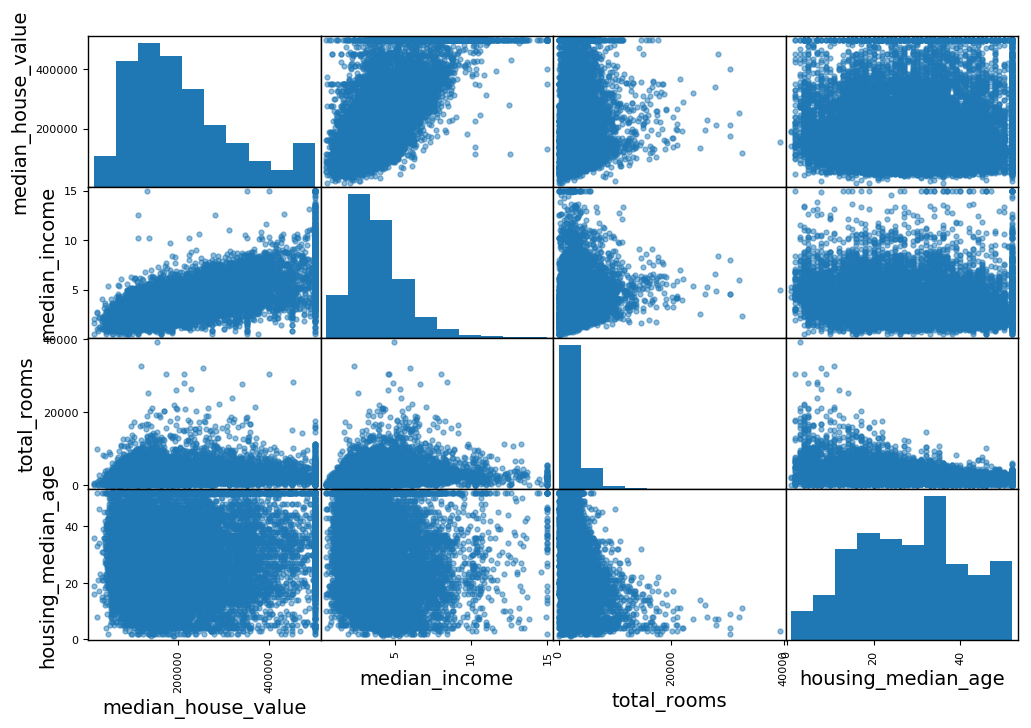

In [18]:
from pandas.tools.plotting import scatter_matrix

atts = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
_ = scatter_matrix(train[atts], figsize=(12, 8))

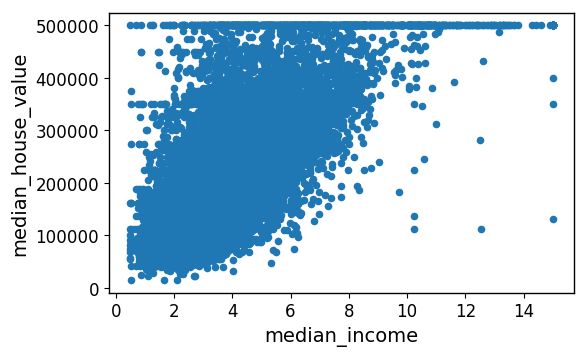

In [19]:
train.plot(kind='scatter', x='median_income', y='median_house_value')

Median income is clearly a reasonable predictor of house value but of course a better model can be obtained by including additional predictors.

So far we have inspected the individual features, checked for outliers and looked at correlations. At this point we already have some simple models in mind. Now let's deal with the messy data.

### Cleaning

In [20]:
hs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_value,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,145737200.0,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,860758500.0,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,174641600.0,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,190445400.0,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,193343000.0,0.172096


In [21]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
total_value           20640 non-null float64
bedrooms_per_room     20433 non-null float64
dtypes: float64(11), object(1)
memory usage: 1.9+ MB


In [108]:
hs[hs.total_bedrooms.isnull()].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,3.0
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,2.0
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,2.0
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,4.0
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,3.0


In [23]:
hs.shape

(20640, 12)

In [24]:
# drop any row with an NaN
hs.dropna().shape

(20433, 12)

In [25]:
b_value = hs.total_bedrooms.median()
b_value

435.0

In [109]:
ds = hs.copy()
ds.drop('ocean_proximity', axis=1, inplace=True)
hs['total_bedrooms'].fillna(b_value, inplace=True)
hs[hs.total_bedrooms.isnull()].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat


In [110]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
income_cat            20640 non-null float64
dtypes: float64(10), object(1)
memory usage: 1.7+ MB


In [111]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
income_cat            20640 non-null float64
dtypes: float64(10)
memory usage: 1.6 MB


In [112]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median')
X = imputer.fit_transform(ds)

Note that X is now a numpy array. To make a dataframe do the following:

In [113]:
df = pd.DataFrame(X, columns=ds.columns)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0


#### Handling text and categorical atrributes

In [114]:
hs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [115]:
pd.get_dummies(hs).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0,0,0,0,1,0


In [117]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
Y = encoder.fit_transform(hs.ocean_proximity)
Y

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ..., 
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [118]:
Z = np.append(X, Y, axis=1)
Z.shape

(20640, 15)

In [119]:
np.c_[X, Y].shape

(20640, 15)

### Custom transformers

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

In [36]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

In [37]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
     def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
          self.add_bedrooms_per_room = add_bedrooms_per_room
     def fit(self, X, y=None):
          return self
     def transform(self, X, y=None):
          rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
          population_per_household = X[:, population_ix] / X[:, household_ix]
          if self.add_bedrooms_per_room:
               bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
               return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
          else:
               return np.c_[X, rooms_per_household, population_per_household]

In [38]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_atts = attr_adder.transform(hs.values)

In [39]:
housing_extra_atts.shape

(20640, 14)

In [40]:
hs.shape

(20640, 12)

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [42]:
pipeline_num = Pipeline([('imputer', Imputer(strategy='median')),
                         ('attr_addr', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler())])

In [43]:
hs_num_trans = pipeline_num.fit_transform(Z)
hs_num_trans

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.62855945,
        -0.04959654, -1.02998783],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.32704136,
        -0.09251223, -0.8888972 ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  1.15562047,
        -0.02584253, -1.29168566],
       ..., 
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.09031802,
        -0.0717345 ,  0.02113407],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.04021111,
        -0.09122515,  0.09346655],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.07044252,
        -0.04368215,  0.11327519]])

In [44]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
     def __init__(self, attribute_names):
          self.attribute_names = attribute_names
     def fit(self, X, y=None):
          return self
     def transform(self, X, y=None):
          return X[self.attribute_names].values

In [45]:
dfs = DataFrameSelector(hs.columns)
reduced = dfs.transform(hs)
reduced

array([[-122.23, 37.88, 41.0, ..., 'NEAR BAY', 145737200.0,
        0.14659090909090908],
       [-122.22, 37.86, 21.0, ..., 'NEAR BAY', 860758500.0,
        0.15579659106916466],
       [-122.24, 37.85, 52.0, ..., 'NEAR BAY', 174641600.0,
        0.12951601908657123],
       ..., 
       [-121.22, 39.43, 17.0, ..., 'INLAND', 92946100.0,
        0.21517302573203195],
       [-121.32, 39.43, 18.0, ..., 'INLAND', 62762700.0,
        0.21989247311827956],
       [-121.24, 39.37, 16.0, ..., 'INLAND', 123997800.0,
        0.22118491921005387]], dtype=object)

In [46]:
list(ds)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'total_value',
 'bedrooms_per_room']

In [47]:
num_attribs = list(xs.columns)
num_attribs.remove('ocean_proximity')
pipeline_num = Pipeline([('dfs', DataFrameSelector(num_attribs)),
                         ('imputer', Imputer(strategy='median')),
                         ('attr_addr', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler())])

In [48]:
cat_attribs = ['ocean_proximity']
pipeline_cat = Pipeline([('dfs', DataFrameSelector(cat_attribs)),
                         ('label_binarizer', LabelBinarizer()),
                         ('std_scaler', StandardScaler())])

In [49]:
from sklearn.pipeline import FeatureUnion

In [50]:
full_pipeline = FeatureUnion([('num_pipe', pipeline_num), ('cat_pipe', pipeline_cat)])

In [51]:
hing = full_pipeline.fit_transform(xs)
hing.shape

/Users/jhalverson/software/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


(20640, 17)

In [52]:
hing.mean(axis=0)

array([ -6.52781016e-15,   1.25626254e-15,   8.55700093e-16,
         1.47518060e-16,  -2.82308092e-16,  -6.46544215e-17,
         2.13935781e-16,   3.73425451e-16,   8.95063524e-16,
         2.70411116e-16,   6.06480843e-19,   6.74809449e-16,
         4.62204241e-14,   2.56162447e-15,  -2.35237127e-15,
        -2.98551397e-14,   2.49039753e-14])